# Banking Behavioral score card model

### The problem statement states that we need to predict the credit risk status of internal liability customers based on the transactions data of savings account. I need to predict 0 or 1 (0 for non-delinquent and 1 for delinquent twice in forward 12 months. I solved this problem using supervised machine learning classification. I used light gbm  classifier for building the model and predicting the target using that model. I trained the model on train dataset given, and predicted the results on test dataset.

### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, roc_curve,f1_score
from sklearn.model_selection import StratifiedKFold

### Loading the train and test datasets

In [2]:
train_df=pd.read_csv("Train.csv")
#test_df=pd.read_csv("Test.csv")


/home/ummarshaik/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (746,835) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Dimensions of the dataset

In [3]:
print(train_df.shape)
#print(test_df.shape)

(17521, 2395)


### There are 17521 data points and 2395 columns in the training data

In [4]:
train_df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,RIGHGSN,1,1.086711e+04,8.648345e+03,1.576618e+04,2.890466e+04,5.273655e+03,2.346153e+04,1.285597e+04,2.871509e+04,...,0,1,0,1,214.0,214.0,68.0,22.0,22.0,7.0
1,RIMHI5ZGP,0,2.584312e+05,2.179633e+05,1.866287e+05,1.866287e+05,2.154519e+05,1.923615e+05,1.726538e+05,1.666974e+05,...,0,0,0,0,41.0,41.0,38.0,12.0,12.0,11.0
2,RIHOG1SZU,0,1.459355e+07,1.260060e+07,1.100315e+07,1.010315e+07,1.879882e+07,1.514035e+07,5.320778e+06,6.906324e+06,...,0,1,1,0,378.0,378.0,310.0,21.0,21.0,16.0
3,RIHOLMQWU,0,6.727043e+05,8.181116e+05,6.794893e+05,6.794893e+05,8.257254e+05,7.605803e+05,3.577134e+05,4.236612e+05,...,0,0,0,0,702.0,702.0,644.0,951.0,951.0,743.0
4,RIHO584ET,0,-1.218742e+06,-3.005361e+06,-1.666241e+05,-2.403574e+06,2.583183e+06,2.086546e+06,5.938358e+06,5.446532e+06,...,0,0,0,0,1305.0,1305.0,1211.0,2205.0,2205.0,1831.0


In [5]:
#test_df.head()

### Col1 Variable: ID

### Col2 Variable: Target Variable

### Col3 to col2397 are anonymized features

In [6]:
train_df['Col2'].value_counts(normalize=True)

0    0.899492
1    0.100508
Name: Col2, dtype: float64

### Approximately 90 percent customers are not default, 10 % customers are default

### The data is unbalanced with respect to target variable 0,1

### Handling missing values 

In [7]:
missing=train_df.isna().sum().sort_values(ascending=False)

In [8]:
missing

Col485     17514
Col813     17514
Col724     17514
Col288     17514
Col266     17514
Col463     17514
Col171     17411
Col930     17127
Col40      17046
Col38      17035
Col556     16985
Col822     16985
Col535     16985
Col359     16979
Col733     16979
Col338     16979
Col832     16968
Col566     16968
Col545     16968
Col369     16965
Col743     16965
Col348     16965
Col925     16905
Col920     16902
Col549     16897
Col570     16897
Col836     16897
Col373     16895
Col747     16895
Col352     16895
           ...  
Col1583        0
Col1582        0
Col1581        0
Col1580        0
Col1579        0
Col1578        0
Col1577        0
Col1576        0
Col1575        0
Col1574        0
Col1573        0
Col1588        0
Col1589        0
Col1590        0
Col1599        0
Col1605        0
Col1604        0
Col1603        0
Col1602        0
Col1601        0
Col1600        0
Col1598        0
Col1591        0
Col1597        0
Col1596        0
Col1595        0
Col1594        0
Col1593       

### so many columns in the data are having missing values

### i gave the minimum threshold for missing values is 14 % columns wise. It means columns which has more than 2450 missing values will dropped from the data

In [9]:
missing[missing>2450].index

Index(['Col485', 'Col813', 'Col724', 'Col288', 'Col266', 'Col463', 'Col171',
       'Col930', 'Col40', 'Col38',
       ...
       'Col855', 'Col766', 'Col851', 'Col762', 'Col466', 'Col816', 'Col488',
       'Col476', 'Col804', 'Col454'],
      dtype='object', length=435)

### 435 columns are having missing values more than 14 %.

In [10]:
2450/17521

0.13983220135836996

### out of 2395 columns 435 Columns are having above threshold

In [12]:
train_df.drop(missing[missing>2450].index,axis=1,inplace=True)
#test_df.drop(missing[missing>2450].index,axis=1,inplace=True)

KeyError: "['Col485' 'Col813' 'Col724' 'Col288' 'Col266' 'Col463' 'Col171' 'Col930'\n 'Col40' 'Col38' 'Col556' 'Col822' 'Col535' 'Col359' 'Col733' 'Col338'\n 'Col832' 'Col566' 'Col545' 'Col369' 'Col743' 'Col348' 'Col925' 'Col920'\n 'Col549' 'Col570' 'Col836' 'Col373' 'Col747' 'Col352' 'Col565' 'Col544'\n 'Col831' 'Col368' 'Col347' 'Col742' 'Col800' 'Col810' 'Col450' 'Col460'\n 'Col482' 'Col472' 'Col263' 'Col711' 'Col253' 'Col275' 'Col285' 'Col721'\n 'Col702' 'Col791' 'Col41' 'Col37' 'Col843' 'Col754' 'Col853' 'Col764'\n 'Col857' 'Col768' 'Col852' 'Col763' 'Col39' 'Col382' 'Col540' 'Col561'\n 'Col827' 'Col572' 'Col343' 'Col738' 'Col375' 'Col185' 'Col364' 'Col788'\n 'Col778' 'Col699' 'Col689' 'Col19' 'Col471' 'Col449' 'Col560' 'Col826'\n 'Col539' 'Col799' 'Col274' 'Col342' 'Col363' 'Col737' 'Col252' 'Col710'\n 'Col20' 'Col537' 'Col824' 'Col558' 'Col340' 'Col361' 'Col735' 'Col536'\n 'Col557' 'Col823' 'Col360' 'Col734' 'Col339' 'Col533' 'Col550' 'Col571'\n 'Col820' 'Col554' 'Col837' 'Col374' 'Col353' 'Col336' 'Col357' 'Col731'\n 'Col748' 'Col150' 'Col155' 'Col149' 'Col151' 'Col152' 'Col153' 'Col154'\n 'Col156' 'Col157' 'Col158' 'Col159' 'Col143' 'Col139' 'Col138' 'Col140'\n 'Col141' 'Col142' 'Col148' 'Col144' 'Col145' 'Col146' 'Col147' 'Col848'\n 'Col759' 'Col828' 'Col541' 'Col562' 'Col365' 'Col739' 'Col344' 'Col847'\n 'Col777' 'Col758' 'Col688' 'Col456' 'Col796' 'Col478' 'Col468' 'Col806'\n 'Col446' 'Col717' 'Col271' 'Col707' 'Col249' 'Col259' 'Col281' 'Col113'\n 'Col99' 'Col845' 'Col835' 'Col532' 'Col569' 'Col548' 'Col819' 'Col553'\n 'Col756' 'Col351' 'Col746' 'Col372' 'Col356' 'Col730' 'Col335' 'Col844'\n 'Col755' 'Col484' 'Col812' 'Col473' 'Col462' 'Col451' 'Col801' 'Col287'\n 'Col276' 'Col712' 'Col265' 'Col254' 'Col723' 'Col841' 'Col858' 'Col752'\n 'Col769' 'Col28' 'Col809' 'Col481' 'Col459' 'Col262' 'Col720' 'Col284'\n 'Col849' 'Col760' 'Col774' 'Col784' 'Col685' 'Col695' 'Col856' 'Col840'\n 'Col767' 'Col751' 'Col779' 'Col790' 'Col690' 'Col701' 'Col859' 'Col770'\n 'Col787' 'Col698' 'Col119' 'Col105' 'Col111' 'Col97' 'Col118' 'Col104'\n 'Col117' 'Col103' 'Col116' 'Col102' 'Col911' 'Col458' 'Col808' 'Col480'\n 'Col470' 'Col448' 'Col798' 'Col283' 'Col719' 'Col261' 'Col709' 'Col251'\n 'Col273' 'Col531' 'Col818' 'Col825' 'Col552' 'Col538' 'Col559' 'Col109'\n 'Col95' 'Col334' 'Col341' 'Col736' 'Col355' 'Col362' 'Col729' 'Col114'\n 'Col912' 'Col100' 'Col112' 'Col115' 'Col101' 'Col677' 'Col786' 'Col776'\n 'Col98' 'Col573' 'Col376' 'Col697' 'Col687' 'Col839' 'Col846' 'Col678'\n 'Col750' 'Col757' 'Col110' 'Col574' 'Col377' 'Col903' 'Col894' 'Col679'\n 'Col96' 'Col174' 'Col605' 'Col604' 'Col602' 'Col603' 'Col555' 'Col479'\n 'Col807' 'Col563' 'Col534' 'Col542' 'Col457' 'Col829' 'Col821' 'Col530'\n 'Col718' 'Col358' 'Col366' 'Col447' 'Col732' 'Col469' 'Col797' 'Col337'\n 'Col345' 'Col740' 'Col260' 'Col282' 'Col551' 'Col817' 'Col272' 'Col728'\n 'Col250' 'Col708' 'Col354' 'Col333' 'Col483' 'Col461' 'Col811' 'Col527'\n 'Col722' 'Col330' 'Col264' 'Col286' 'Col547' 'Col568' 'Col834' 'Col528'\n 'Col564' 'Col745' 'Col350' 'Col371' 'Col830' 'Col331' 'Col543' 'Col346'\n 'Col367' 'Col741' 'Col108' 'Col902' 'Col893' 'Col465' 'Col815' 'Col487'\n 'Col803' 'Col453' 'Col475' 'Col268' 'Col726' 'Col290' 'Col256' 'Col278'\n 'Col714' 'Col546' 'Col833' 'Col567' 'Col529' 'Col349' 'Col370' 'Col744'\n 'Col332' 'Col94' 'Col877' 'Col876' 'Col805' 'Col455' 'Col477' 'Col173'\n 'Col409' 'Col445' 'Col407' 'Col408' 'Col406' 'Col795' 'Col467' 'Col258'\n 'Col716' 'Col280' 'Col172' 'Col270' 'Col248' 'Col209' 'Col210' 'Col211'\n 'Col212' 'Col706' 'Col865' 'Col869' 'Col873' 'Col868' 'Col864' 'Col872'\n 'Col905' 'Col907' 'Col915' 'Col904' 'Col910' 'Col908' 'Col909' 'Col906'\n 'Col18' 'Col842' 'Col850' 'Col785' 'Col761' 'Col753' 'Col696' 'Col775'\n 'Col838' 'Col686' 'Col749' 'Col789' 'Col700' 'Col814' 'Col486' 'Col464'\n 'Col802' 'Col452' 'Col474' 'Col289' 'Col725' 'Col267' 'Col255' 'Col713'\n 'Col277' 'Col855' 'Col766' 'Col851' 'Col762' 'Col466' 'Col816' 'Col488'\n 'Col476' 'Col804' 'Col454'] not found in axis"

### shape of the dataset after removing missing values

In [13]:
print(train_df.shape)
#print(test_df.shape)

(17521, 1960)


### filling missing values with 0 (no transaction)

In [15]:
train_df=train_df.fillna(0)
#test_df=test_df.fillna(0)

### Feature Engineering

### Creating extra columns like sum of all tranasactions, minimum, maximum, mean, standard deviation, skewness, kurtosis, median, standard error of mean, 25 percentile and 75 percentile

In [16]:
train_df['sum']=train_df.iloc[:,2:].sum(axis=1)
train_df['min']=train_df.iloc[:,2:].min(axis=1)
train_df['max']=train_df.iloc[:,2:].max(axis=1)
train_df['mean']=train_df.iloc[:,2:].mean(axis=1)
train_df['std']=train_df.iloc[:,2:].std(axis=1)
train_df['skew']=train_df.iloc[:,2:].skew(axis=1)
train_df['kurt']=train_df.iloc[:,2:].kurtosis(axis=1)
train_df['median']=train_df.iloc[:,2:].median(axis=1)

train_df['sem']=train_df.iloc[:,2:].sem(axis=1)
train_df['q1']=train_df.iloc[:,2:].quantile(0.25,axis=1)
train_df['q2']=train_df.iloc[:,2:].quantile(0.75,axis=1)


#test_df['sum']=test_df.iloc[:,1:].sum(axis=1)
#test_df['min']=test_df.iloc[:,1:].min(axis=1)
#test_df['max']=test_df.iloc[:,1:].max(axis=1)
#test_df['mean']=test_df.iloc[:,1:].mean(axis=1)
#test_df['std']=test_df.iloc[:,1:].std(axis=1)
#test_df['skew']=test_df.iloc[:,1:].skew(axis=1)
#test_df['kurt']=test_df.iloc[:,1:].kurtosis(axis=1)
#test_df['median']=test_df.iloc[:,1:].median(axis=1)
#test_df['q1']=test_df.iloc[:,1:].quantile(0.25,axis=1)
#test_df['q2']=test_df.iloc[:,1:].quantile(0.75,axis=1)
#test_df['sem']=test_df.iloc[:,1:].sem(axis=1)


## Exploratory data analysis and visualizations

In [17]:
train_df.describe()

,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,...,min,max,mean,std,skew,kurt,median,sem,q1,q2
count,17521.000000,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,...,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,17521.000000,17521.000000,17521.000000,1.752100e+04,17521.000000,17521.000000
mean,0.100508,3.158967e+04,2.046540e+04,2.502937e+04,2.789385e+04,2.597734e+04,3.302600e+04,2.912693e+04,2.971069e+04,3.617392e+04,...,-1.285651e+04,3.151903e+06,4.815295e+03,1.030609e+05,29.277060,909.839847,0.380287,2.322566e+03,0.002739,1.359591
std,0.300685,7.612897e+05,7.136908e+05,6.018207e+05,6.091245e+05,7.211998e+05,7.488433e+05,2.175595e+05,2.981508e+05,2.612427e+05,...,7.540841e+05,3.954371e+07,6.036487e+04,1.295477e+06,0.788570,67.077126,0.495693,2.919421e+04,0.043915,0.799394
min,0.000000,-8.555719e+07,-8.555719e+07,-7.011955e+07,-7.100920e+07,-8.480658e+07,-9.016250e+07,0.000000e+00,0.000000e+00,0.000000e+00,...,-9.016250e+07,1.000000e+01,-7.798803e+02,3.361153e-01,-27.214661,160.714288,0.000000,2.986275e-01,0.000000,0.000000
25%,0.000000,2.742337e+03,2.007863e+03,1.857013e+03,2.562647e+03,2.973188e+03,3.822170e+03,1.824148e+03,1.787456e+03,3.505288e+03,...,-6.350986e-01,5.398288e+05,8.258424e+02,1.760388e+04,29.221016,888.689828,0.000000,3.967118e+02,0.000000,1.000000
50%,0.000000,9.308060e+03,6.642857e+03,6.236503e+03,8.464355e+03,1.036962e+04,1.303534e+04,5.705458e+03,5.536147e+03,8.832639e+03,...,-3.654230e-01,9.599698e+05,1.468592e+03,3.131209e+04,29.403774,896.782006,0.000000,7.056329e+02,0.000000,1.279600
75%,0.000000,3.053873e+04,2.156093e+04,2.068154e+04,2.773849e+04,2.645998e+04,3.359204e+04,1.852222e+04,1.753976e+04,2.341911e+04,...,-2.099563e-01,2.024124e+06,3.096569e+03,6.600923e+04,29.580240,905.726824,1.000000,1.487550e+03,0.000000,2.000000
max,1.000000,1.459355e+07,1.288980e+07,1.478068e+07,1.178075e+07,1.879882e+07,1.514035e+07,1.125630e+07,2.788633e+07,1.314762e+07,...,0.000000e+00,3.400036e+09,5.199950e+06,1.112163e+08,30.791209,1219.871577,2.000000,2.506314e+06,1.000000,3.000000


In [18]:
features=train_df.iloc[:,2:].columns

### Distribution plot of kurtosis values in target 0 and target 1

/home/hduser/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/hduser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/hduser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


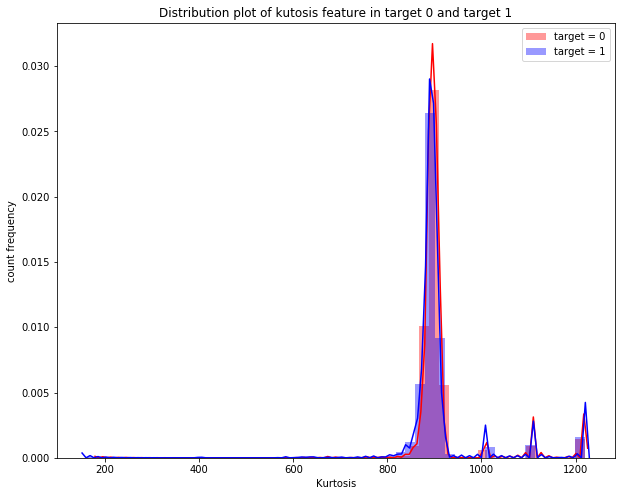

<Figure size 432x288 with 0 Axes>

In [17]:
label_0 = train_df.loc[train_df['Col2'] == 0]
label_1 = train_df.loc[train_df['Col2'] == 1]
plt.figure(figsize=(10,8))
plt.title("Distribution plot of kutosis feature in target 0 and target 1")
sns.distplot(label_0['kurt'],color="red", kde=True, label='target = 0')
sns.distplot(label_1['kurt'],color="blue", kde=True, label='target = 1')
plt.xlabel("Kurtosis")
plt.ylabel("count frequency")
plt.legend(); plt.show()
plt.savefig('Dist_kurt')

### target 1 kurtosis is less than the target 0

### Distribution of Skewnness in target 0 and target 1

/home/hduser/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/hduser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/hduser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


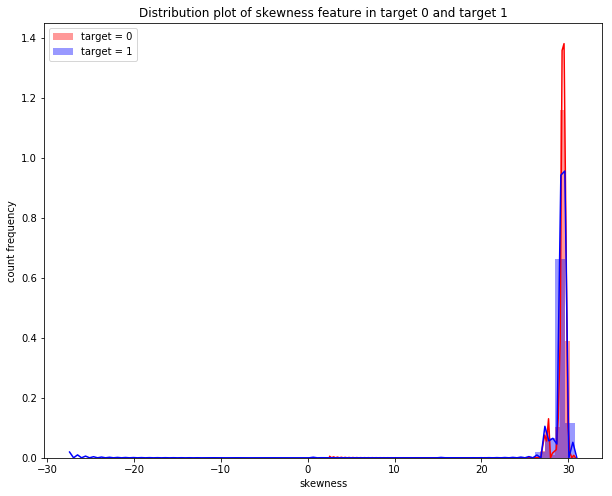

In [18]:
plt.figure(figsize=(10,8))
plt.title("Distribution plot of skewness feature in target 0 and target 1")
sns.distplot(label_0['skew'],color="red", kde=True, label='target = 0')
sns.distplot(label_1['skew'],color="blue", kde=True, label='target = 1')
plt.xlabel("skewness")
plt.ylabel("count frequency")
plt.legend(); plt.show()

### Distribution of Standard deviation in target 0 and target 1

/home/hduser/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/hduser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/hduser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


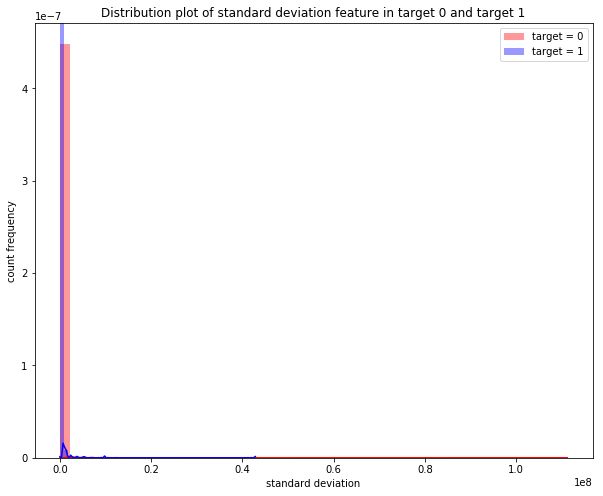

In [19]:
plt.figure(figsize=(10,8))
plt.title("Distribution plot of standard deviation feature in target 0 and target 1")
sns.distplot(label_0['std'],color="red", kde=True, label='target = 0')
sns.distplot(label_1['std'],color="blue", kde=True, label='target = 1')
plt.xlabel("standard deviation")
plt.ylabel("count frequency")
plt.legend(); plt.show()

### Standard deviation is more in target 1

### Distribution of mean in target 0 and target 1

/home/hduser/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/hduser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/hduser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


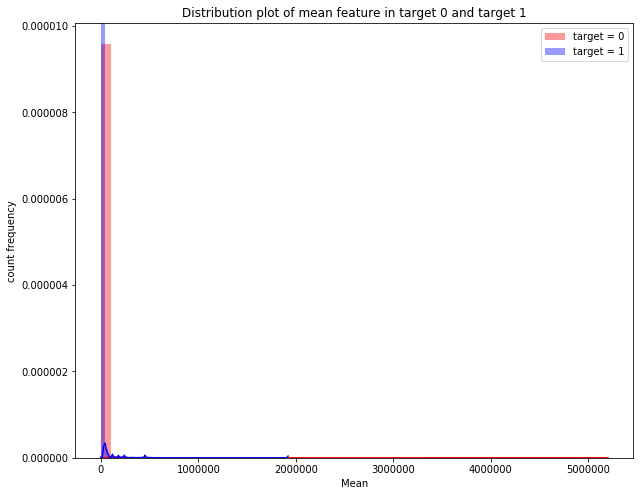

In [20]:
plt.figure(figsize=(10,8))
plt.title("Distribution plot of mean feature in target 0 and target 1")
sns.distplot(label_0['mean'],color="red", kde=True, label='target = 0')
sns.distplot(label_1['mean'],color="blue", kde=True, label='target = 1')
plt.xlabel("Mean")
plt.ylabel("count frequency")
plt.legend(); plt.show()

### Distribution of maximum values  in target 0 and target 1

/home/hduser/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/hduser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/hduser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


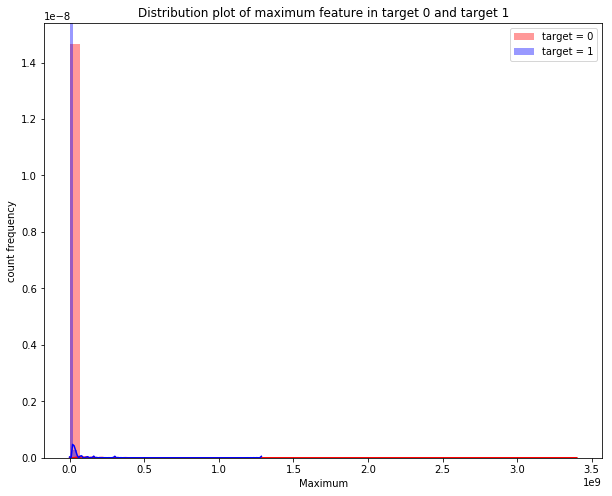

In [21]:
plt.figure(figsize=(10,8))
plt.title("Distribution plot of maximum feature in target 0 and target 1")
sns.distplot(label_0['max'],color="red", kde=True, label='target = 0')
sns.distplot(label_1['max'],color="blue", kde=True, label='target = 1')
plt.xlabel("Maximum")
plt.ylabel("count frequency")
plt.legend(); plt.show()

### Distribution of standard error in target 0 and target 1

/home/hduser/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/hduser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/hduser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


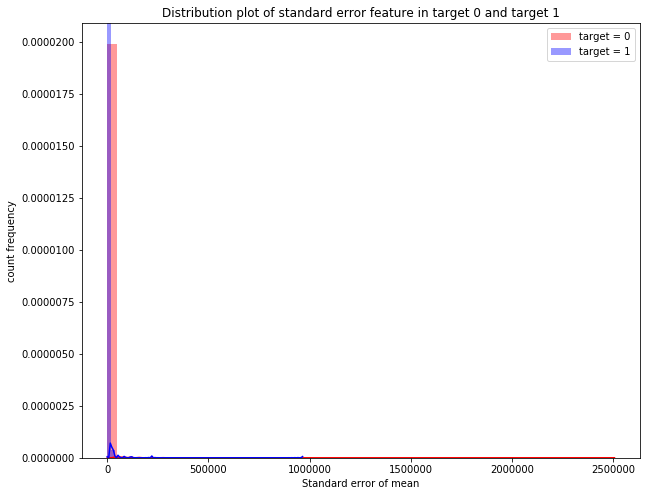

In [22]:
plt.figure(figsize=(10,8))
plt.title("Distribution plot of standard error feature in target 0 and target 1")
sns.distplot(label_0['sem'],color="red", kde=True, label='target = 0')
sns.distplot(label_1['sem'],color="blue", kde=True, label='target = 1')
plt.xlabel("Standard error of mean")
plt.ylabel("count frequency")
plt.legend(); plt.show()

### standard error is more in target 1

In [19]:
train_df

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,min,max,mean,std,skew,kurt,median,sem,q1,q2
0,RIGHGSN,1,1.086711e+04,8.648345e+03,1.576618e+04,2.890466e+04,5.273655e+03,2.346153e+04,1.285597e+04,2.871509e+04,...,-3.824308e-01,4.074394e+06,6.233137e+03,1.332759e+05,29.229200,886.082938,0.000000,3.003438e+03,0.0,1.000000
1,RIMHI5ZGP,0,2.584312e+05,2.179633e+05,1.866287e+05,1.866287e+05,2.154519e+05,1.923615e+05,1.726538e+05,1.666974e+05,...,-2.884012e-01,4.490479e+07,6.869678e+04,1.463186e+06,29.498185,899.479593,0.000000,3.297361e+04,0.0,0.616856
2,RIHOG1SZU,0,1.459355e+07,1.260060e+07,1.100315e+07,1.010315e+07,1.879882e+07,1.514035e+07,5.320778e+06,6.906324e+06,...,-3.476104e-01,1.620088e+09,2.478461e+06,5.297099e+07,29.239550,887.392299,0.457378,1.193727e+06,0.0,2.000000
3,RIHOLMQWU,0,6.727043e+05,8.181116e+05,6.794893e+05,6.794893e+05,8.257254e+05,7.605803e+05,3.577134e+05,4.236612e+05,...,-7.750000e+00,2.186238e+08,3.344576e+05,7.135591e+06,29.367561,893.555538,0.000000,1.608041e+05,0.0,2.000000
4,RIHO584ET,0,-1.218742e+06,-3.005361e+06,-1.666241e+05,-2.403574e+06,2.583183e+06,2.086546e+06,5.938358e+06,5.446532e+06,...,-3.005361e+06,3.400036e+09,5.199950e+06,1.112163e+08,29.205201,885.892562,0.000000,2.506314e+06,0.0,1.000000
5,RIHR51XD6,0,3.911176e+06,3.911176e+06,2.995007e+06,2.995007e+06,4.519330e+06,4.999873e+06,1.610207e+06,2.116667e+06,...,-1.216820e+00,1.842918e+08,2.819355e+05,5.994246e+06,29.638820,905.899934,0.000000,1.350833e+05,0.0,0.000799
6,RDHD6BX,0,1.173942e+05,8.499665e+04,8.499665e+04,8.499665e+04,9.209092e+04,9.209092e+04,3.618990e+04,3.618990e+04,...,-2.520884e-01,1.706124e+06,2.610082e+03,5.538291e+04,29.783778,912.995280,0.000113,1.248081e+03,0.0,1.000000
7,RS0UVS4,0,2.582386e+05,2.101529e+05,2.104294e+05,2.416836e+05,2.458873e+05,2.793668e+05,9.263240e+04,5.521743e+04,...,-3.212427e-01,5.417824e+06,8.288359e+03,1.761772e+05,29.652120,906.733352,0.000000,3.970240e+03,0.0,0.000000
8,TIWWI0K5,0,1.463930e+04,1.581304e+04,1.928101e+04,1.598447e+04,1.656301e+04,1.761563e+04,2.573648e+03,2.380503e+03,...,-3.240000e+00,3.932400e+05,6.015894e+02,1.277862e+04,29.710668,909.230010,0.607707,2.879724e+02,0.0,2.000000
9,T9VBLOY9,0,8.405841e+04,3.268636e+04,3.268636e+04,6.535643e+04,6.832092e+04,1.366293e+05,5.293322e+04,5.889939e+04,...,-1.549900e-01,4.693014e+06,7.179522e+03,1.528419e+05,29.545894,901.343369,0.000000,3.444366e+03,0.0,1.000000


# Model creation using Light gbm

### Light GBM is a gradient boosting framework that uses tree based learning algorithm.

In [23]:
features = [c for c in train_df.columns if c not in ['Col1','Col2']]
target = train_df['Col2']


### Parameters

In [24]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.8,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.05,
    'learning_rate': 0.01,
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1
}

### 10-fold startified cross validation on training and predicting on the test data set

In [25]:
folds = StratifiedKFold(n_splits=10, shuffle=False, random_state=44000)
oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 1000000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 3000)
    oof[val_idx] = clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

Fold 0
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.869273	valid_1's auc: 0.756795
[2000]	training's auc: 0.938404	valid_1's auc: 0.755637
[3000]	training's auc: 0.969223	valid_1's auc: 0.751291
[4000]	training's auc: 0.982351	valid_1's auc: 0.746587
Early stopping, best iteration is:
[1063]	training's auc: 0.87568	valid_1's auc: 0.758157
Fold 1
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.868494	valid_1's auc: 0.765661
[2000]	training's auc: 0.937486	valid_1's auc: 0.766483
[3000]	training's auc: 0.969011	valid_1's auc: 0.763076
[4000]	training's auc: 0.981622	valid_1's auc: 0.762452
Early stopping, best iteration is:
[1816]	training's auc: 0.928584	valid_1's auc: 0.767063
Fold 2
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.870731	valid_1's auc: 0.753867
[2000]	training's auc: 0.938339	valid_1's auc: 0.753784
[3000]	training's auc: 0.969507	valid_1's auc:

### the cross validation score of Area under the curve is 0.7380

### The predicted probabilities of credit risk on test data set are

In [26]:
predictions

array([0.068802  , 0.2618358 , 0.02991139, ..., 0.05047732, 0.04121617,
       0.36438469])

### feature importance of the columns are

In [27]:
feature_importance_df.sort_values(by='importance',ascending=False)

,Feature,importance,fold
456,Col875,127,2
115,Col177,123,2
179,Col246,117,2
456,Col875,116,9
464,Col885,114,2
455,Col874,110,2
283,Col443,106,2
115,Col177,106,9
455,Col874,105,9
179,Col246,103,9


In [28]:
feature_importance_df[feature_importance_df['importance']==0].nunique()

Feature       1205
importance       1
fold            10
dtype: int64

### there are 1205 columns which are zero feature importance im different folds

## plotting first 200 features which are having highest importance

/home/hduser/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


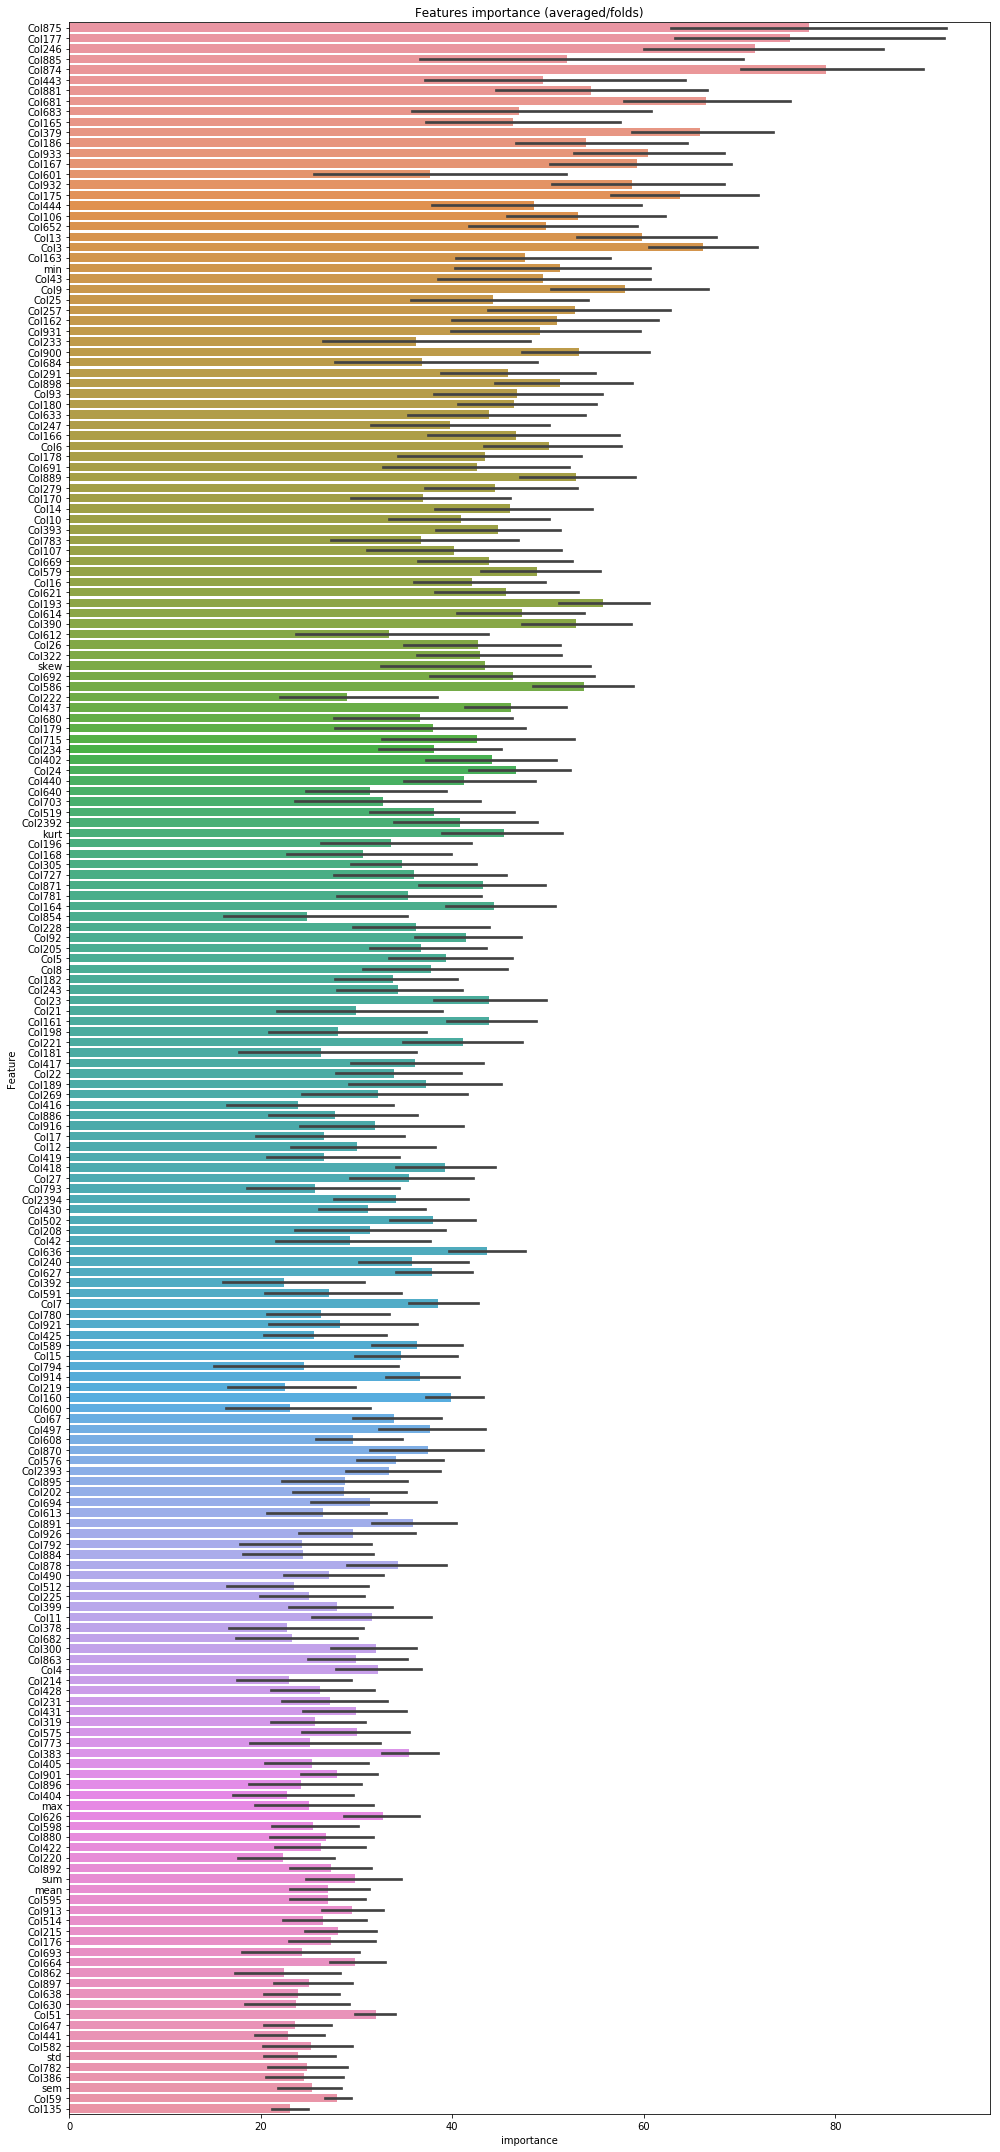

In [29]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:200].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,30))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()

### since the predictions are in probabilities , we need to convert into target '0' and target '1'

### target '0' low credit risk and target '1' is high credit risk

### i gave the threshold value of probability 0.308, it means the predicted probability greater than 0.308 are considered as target'1', and less than or equal to 0.308 are considered target '0'

In [30]:
y_pred= (predictions>0.308).astype(int)

In [31]:
y_pred.sum()

882

### there are 882 customers in the test data which are of high credit risk

### The banking behavior score in my model is (1-predictions)*1000

In [32]:
behavior_score=(1-predictions)*1000

In [33]:
data_score=pd.DataFrame(behavior_score,index=test_df['Col1'])

In [34]:
data_score.rename(columns = {0:'score'},inplace=True)

### First 20 rows of behavior scores are

In [35]:
data_score.head(20)

,score
Col1,
RIGD58ZWD,931.198003
RIH660YDS,738.164203
RIH660Q96,970.088606
RIYDO15W1,922.763846
RIYBGC1ZD,976.747329
RIYBQ5SWR,762.129080
RIYBQ5SD5,974.241142
TI5HU5XY,921.232288
TIYHGOSE,888.986234


### Submission

In [36]:
sample=pd.read_csv("Sample_submission.csv")

In [37]:
sample

,Col1,Col2
0,RIGD58ZWD,0
1,RIH660YDS,1
2,RIH660Q96,0
3,RIYDO15W1,1


In [38]:
test_sample_submission=pd.read_csv("Test.csv")

/home/hduser/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (700,731,740,752,761,789,811,820,829,841,850) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
sample=test_sample_submission[['Col1']]

In [40]:
sample['Col2']=y_pred

/home/hduser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### My submission first 20 rows are 

In [41]:
sample.head(20)

,Col1,Col2
0,RIGD58ZWD,0
1,RIH660YDS,0
2,RIH660Q96,0
3,RIYDO15W1,0
4,RIYBGC1ZD,0
5,RIYBQ5SWR,0
6,RIYBQ5SD5,0
7,TI5HU5XY,0
8,TIYHGOSE,0
9,T90K61QJ,0


### saving the submission into csv file

In [42]:
sample.to_csv('light_gbm_msth2450-308.csv',index=False)